In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

path = './data/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [32]:
sigungu = pd.read_csv(path+'sigungu_imp_10.csv', encoding='cp949')
sigungu_3 = pd.read_csv(path+'시군구별지역안전지표_2015.csv', encoding='cp949')

In [33]:
y_bin = sigungu.iloc[:,-7:] #등급(binary) - 15년, 14년도 
y_deci = sigungu_3.iloc[:,-7:] #등급(1-5) - 15년
X = sigungu.iloc[:,4:-7] #독립변수X - 15년 
name = sigungu.iloc[:,:4] #이름 - 15년

In [34]:
y_bin.columns = ['fire','transport','disaster','crime','accident','suicide','infection']

# 표준화

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
Xscaled = scaler.fit_transform(X)

In [54]:
Xscaled = pd.DataFrame(data = Xscaled)
Xscaled.columns = X.columns
Xscaled.shape

(226, 144)

In [64]:
sigungu_xy = pd.concat([Xscaled,y_bin], axis=1)
sigungu_nxy = pd.concat([name, sigungu_xy], axis=1) #스케일링, 바이너리등급 완료된 전체df

# corr

In [65]:
corr_df = sigungu_xy.corr(method='pearson')

In [66]:
corr_df.head(2)

,1인가구수,5대범죄 발생건수,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,건강보험급여실적,건설업 업체수,건설업 종사자수,건축용지 면적,경찰관서수,고령인구수,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,교통사고사망자수(고속도로),구거면적,구거면적 비율,구급발생건수,구조구급 발생건수,구조구급대원수,구조발생건수,급경사지 붕괴위험지구 수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,도로면적,도로면적 비율,도로연장,도시지역 면적,도시지역 면적 비율,독거노인수,무면허교통사고 발생건수,반지하가구 수,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행자전용·우선도로 면적,보행자전용·우선도로 연장,비닐하우스 면적,빈집수,산사태위험지역 면적,상업지역 면적,수계밀도,순이동자수,스트레스인지율,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,실업률,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 아토피,어린이 천식,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보험료,의료인력,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,임야 면적,자동차등록대수,자살 사망자수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액(10년평균),자연재해 피해자수(10년평균),자연재해위험개선지구 수,장애인수,재난약자수,재정자립도,재정자주도,전기화재발생건수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주간인구지수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업체수,총전입자수,추락 사망자수,특수의료장비수,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),해안선 길이,행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재피해 경감액,fire,transport,disaster,crime,accident,suicide,infection
1인가구수,1.000000,0.055994,0.102946,0.157972,0.157000,0.675918,0.684771,0.500962,0.174032,-0.205752,0.592030,0.747506,0.588921,-0.211780,-0.423133,-0.146587,-0.121528,0.534827,0.211889,0.097715,0.097729,0.373582,0.341808,0.418917,0.237875,0.234264,0.659770,0.702086,0.568335,0.539071,-0.192116,-0.192114,-0.149188,-0.420062,-0.420061,0.794416,0.347236,-0.192540,0.089987,0.019949,0.252849,0.109052,0.150815,0.236403,0.072368,0.064801,0.034460,0.295714,0.278970,0.071471,-0.190858,-0.141062,-0.244800,0.515852,0.111406,0.140057,0.169326,-0.202156,-0.293781,-0.193610,-0.370200,-0.172482,-0.003113,-0.211890,-0.509328,0.093616,0.054537,-0.190808,-0.009300,-0.187595,-0.244129,-0.051827,-0.149574,-0.452505,-0.462954,0.134606,0.134619,-0.594563,0.414773,0.185396,0.347236,0.419511,0.011259,-0.016772,-0.016038,-0.518961,0.285547,-0.163575,0.390347,-0.199855,-0.189126,0.260866,0.224164,0.302130,-0.093613,-0.076882,-0.140013,-0.074159,-0.123839,0.423184,0.682915,0.718331,-0.576413,0.055441,0.298453,-0.142280,-0.142216,-0.012154,-0.204202,0.212477,-0.219445,-0.489786,-0.717578,0.749303,0.315706,-0.640808,-0.108438,-0.083064,0.086305,0.129608,0.018985,0.631824,0.201029,-0.676373,-0.686876,-0.438013,0.417918,0.081387,-0.149864,-0.149870,-0.143672,0.530392,0.571711,0.508509,0.127021,0.320163,0.284303,0.387631,0.081826,-0.027052,0.177719,0.017039,0.133479,-0.054921,0.257299,0.279544,-0.076351,0.095069,0.334412,0.382088,0.512742
5대범죄 발생건수,0.055994,1.000000,0.001906,-0.001164,-0.073998,-0.314125,-0.345728,-0.210697,0.259030,0.575590,-0.363027,-0.349511,-0.376198,0.189361,0.164503,0.695103,0.524948,-0.359546,-0.259384,-0.276656,-0.276681,-0.210388,-0.201843,-0.322002,-0.152794,-0.208267,-0.106274,-0.192401,0.037173,-0.381340,0.626956,0.626955,0.129902,0.501267,0.501267,-0.342803,0.521047,0.266761,0.898937,0.650987,0.200723,0.366158,0.207871,0.209954,0.059186,0.959050,0.943813,0.300605,0.630283,0.726995,-0.093369,-0.125829,-0.036844,-0.447632,0.114061,0.787419,-0.106275,-0.195583,0.351869,0.595668,0.230963,0.159027,-0.219909,0.390844,0.446541,0.365357,-0.152044,0.125616,-0.137274,-0.032363,0.101932,0.246101,0.208630,0.407003,0.287340,-0.140255,-0.140259,0.059903,0.569621,0.792814,0.521047,0.657561,-0.289014,0.685987,0.685108,0.381909,0.188431,0.140090,-0.221519,0.418597,-0.212880,-0.478373,-0.133262,-0.103843,0.483739,0.019489,0.068901,-0.030231,0.078256,-0.321659,-0.410483,-0.382899,0.396305,-0.194755,-0.110111,0.074962,0.075011,0.356366,0.028869,0.560439,0.457882,0.194054,0.041195,-0.328719,0.088612,0.059313,0.009342,-0.033861,-0.063762,-0.440271,0.115704,-0.32369

In [67]:
df = pd.DataFrame(corr_df.crime)
df.reset_index(inplace=True)
df.columns=['feature','corr']
df.to_csv('crimecorr.csv',encoding='cp949',index=False)

In [68]:
corr_df = sigungu_xy.corr(method='pearson')
for i in range(len(corr_df)):
    for j in range(len(corr_df)):
        if i!= j:
            if abs(corr_df.iloc[i,j])>0.5:
                print(round(corr_df.iloc[i,j],3),'\t-->', corr_df.columns[i],'/',corr_df.columns[j])

0.676 	--> 1인가구수 / 감염병 사망자수
0.685 	--> 1인가구수 / 건강보험급여실적
0.501 	--> 1인가구수 / 건설업 업체수
0.592 	--> 1인가구수 / 경찰관서수
0.748 	--> 1인가구수 / 고령인구수
0.589 	--> 1인가구수 / 공무원수(정원)
0.535 	--> 1인가구수 / 교통사고 사망자수
0.66 	--> 1인가구수 / 기초수급자수
0.702 	--> 1인가구수 / 기초수급자수(65세이상)
0.568 	--> 1인가구수 / 노인 교통사고 부상자수
0.539 	--> 1인가구수 / 노인 교통사고 사망자수
0.794 	--> 1인가구수 / 독거노인수
0.516 	--> 1인가구수 / 빈집수
-0.509 	--> 1인가구수 / 실업률
-0.595 	--> 1인가구수 / 유치원생수
-0.519 	--> 1인가구수 / 의료보험료
0.683 	--> 1인가구수 / 장애인수
0.718 	--> 1인가구수 / 재난약자수
-0.576 	--> 1인가구수 / 재정자립도
-0.718 	--> 1인가구수 / 주민등록인구(14세이하)
0.749 	--> 1인가구수 / 주민등록인구(60세이상)
-0.641 	--> 1인가구수 / 주민등록인구(청소년)
0.632 	--> 1인가구수 / 질병이환 및 사망외인으로 인한 사망자수
-0.676 	--> 1인가구수 / 초등학생수
-0.687 	--> 1인가구수 / 총 사업체수
0.53 	--> 1인가구수 / 학교수(고등학교)
0.572 	--> 1인가구수 / 학교수(중학교)
0.509 	--> 1인가구수 / 학교수(초등학교)
0.513 	--> 1인가구수 / infection
0.576 	--> 5대범죄 발생건수 / 건축용지 면적
0.695 	--> 5대범죄 발생건수 / 교통사고 발생건수
0.525 	--> 5대범죄 발생건수 / 교통사고 부상자수
0.627 	--> 5대범죄 발생건수 / 도로면적
0.627 	--> 5대범죄 발생건수 / 도로면적 비율
0.501 	--> 5대범죄 발생건수 / 도시지

0.548 	--> 구조구급대원수 / 화재 발생건수
0.578 	--> 구조발생건수 / 공무원수(정원)
0.664 	--> 구조발생건수 / 구급발생건수
0.894 	--> 구조발생건수 / 구조구급 발생건수
0.55 	--> 구조발생건수 / 학교수(고등학교)
0.506 	--> 급경사지 붕괴위험지구 수 / 공무원수(정원)
0.52 	--> 급경사지 붕괴위험지구 수 / 빈집수
0.542 	--> 급경사지 붕괴위험지구 수 / 학교수(초등학교)
0.66 	--> 기초수급자수 / 1인가구수
0.657 	--> 기초수급자수 / 감염병 사망자수
0.672 	--> 기초수급자수 / 건강보험급여실적
0.568 	--> 기초수급자수 / 경찰관서수
0.736 	--> 기초수급자수 / 고령인구수
0.552 	--> 기초수급자수 / 공무원수(정원)
0.525 	--> 기초수급자수 / 교통사고 사망자수
0.933 	--> 기초수급자수 / 기초수급자수(65세이상)
0.61 	--> 기초수급자수 / 노인 교통사고 부상자수
0.533 	--> 기초수급자수 / 노인 교통사고 사망자수
0.745 	--> 기초수급자수 / 독거노인수
0.534 	--> 기초수급자수 / 빈집수
-0.553 	--> 기초수급자수 / 실업률
-0.728 	--> 기초수급자수 / 의료보험료
0.778 	--> 기초수급자수 / 장애인수
0.731 	--> 기초수급자수 / 재난약자수
-0.743 	--> 기초수급자수 / 재정자립도
-0.576 	--> 기초수급자수 / 주민등록인구
-0.618 	--> 기초수급자수 / 주민등록인구(14세이하)
0.742 	--> 기초수급자수 / 주민등록인구(60세이상)
-0.504 	--> 기초수급자수 / 주민등록인구(청소년)
0.661 	--> 기초수급자수 / 질병이환 및 사망외인으로 인한 사망자수
-0.561 	--> 기초수급자수 / 초등학생수
-0.776 	--> 기초수급자수 / 총 사업체수
0.542 	--> 기초수급자수 / 학교수(고등학교)
0.566 	--> 기초수급자수 / 학교수

0.5 	--> 범죄발생건수(강도) / 보행사상자수
0.959 	--> 범죄발생건수(절도) / 5대범죄 발생건수
0.542 	--> 범죄발생건수(절도) / 건축용지 면적
0.707 	--> 범죄발생건수(절도) / 교통사고 발생건수
0.54 	--> 범죄발생건수(절도) / 교통사고 부상자수
0.6 	--> 범죄발생건수(절도) / 도로면적
0.6 	--> 범죄발생건수(절도) / 도로면적 비율
0.523 	--> 범죄발생건수(절도) / 무면허교통사고 발생건수
0.853 	--> 범죄발생건수(절도) / 범죄발생건수(강간.강제추행)
0.634 	--> 범죄발생건수(절도) / 범죄발생건수(강도)
0.812 	--> 범죄발생건수(절도) / 범죄발생건수(폭력)
0.637 	--> 범죄발생건수(절도) / 보건업 및 사회복지서비스업 종사자수
0.733 	--> 범죄발생건수(절도) / 보행사상자수
0.767 	--> 범죄발생건수(절도) / 상업지역 면적
0.555 	--> 범죄발생건수(절도) / 시가화율
0.51 	--> 범죄발생건수(절도) / 음식점 및 주점업 업체수
0.733 	--> 범죄발생건수(절도) / 음식점 및 주점업 종사자수
0.523 	--> 범죄발생건수(절도) / 음주교통사고 발생건수
0.68 	--> 범죄발생건수(절도) / 의료기관수(요양기관)
0.651 	--> 범죄발생건수(절도) / 의료보장 근로자 사업장수
0.651 	--> 범죄발생건수(절도) / 의료보장 사업장수
0.535 	--> 범죄발생건수(절도) / 주간인구지수
0.673 	--> 범죄발생건수(절도) / 특수의료장비수
0.944 	--> 범죄발생건수(폭력) / 5대범죄 발생건수
0.555 	--> 범죄발생건수(폭력) / 건축용지 면적
0.607 	--> 범죄발생건수(폭력) / 교통사고 발생건수
0.595 	--> 범죄발생건수(폭력) / 도로면적
0.595 	--> 범죄발생건수(폭력) / 도로면적 비율
0.84 	--> 범죄발생건수(폭력) / 범죄발생건수(강간.강제추행)
0.597 	--> 범죄발생건

0.87 	--> 음식점 및 주점업 종사자수 / 음식점 및 주점업 업체수
0.542 	--> 음식점 및 주점업 종사자수 / 음주교통사고 발생건수
0.703 	--> 음식점 및 주점업 종사자수 / 의료기관수(요양기관)
0.789 	--> 음식점 및 주점업 종사자수 / 의료보장 근로자 사업장수
0.789 	--> 음식점 및 주점업 종사자수 / 의료보장 사업장수
0.796 	--> 음식점 및 주점업 종사자수 / 주간인구지수
0.604 	--> 음식점 및 주점업 종사자수 / 창고 및 운송관련 서비스업 업체수
0.553 	--> 음식점 및 주점업 종사자수 / 특수의료장비수
0.508 	--> 음식점 및 주점업 종사자수 / 화재구조실적
0.521 	--> 음주교통사고 발생건수 / 5대범죄 발생건수
0.644 	--> 음주교통사고 발생건수 / 교통사고 발생건수
0.613 	--> 음주교통사고 발생건수 / 교통사고 부상자수
0.605 	--> 음주교통사고 발생건수 / 노인 교통사고 부상자수
1.0 	--> 음주교통사고 발생건수 / 무면허교통사고 발생건수
0.512 	--> 음주교통사고 발생건수 / 범죄발생건수(강간.강제추행)
0.523 	--> 음주교통사고 발생건수 / 범죄발생건수(절도)
0.572 	--> 음주교통사고 발생건수 / 보건업 및 사회복지서비스업 종사자수
0.683 	--> 음주교통사고 발생건수 / 보행사상자수
0.552 	--> 음주교통사고 발생건수 / 음식점 및 주점업 업체수
0.542 	--> 음주교통사고 발생건수 / 음식점 및 주점업 종사자수
0.565 	--> 음주교통사고 발생건수 / 의료기관수(요양기관)
0.531 	--> 음주교통사고 발생건수 / 주간인구지수
0.658 	--> 의료기관수(요양기관) / 5대범죄 발생건수
0.565 	--> 의료기관수(요양기관) / 무면허교통사고 발생건수
0.72 	--> 의료기관수(요양기관) / 범죄발생건수(강간.강제추행)
0.68 	--> 의료기관수(요양기관) / 범죄발생건수(절도)
0.55 	--> 의료기관수(요

-0.775 	--> 재정자립도 / 장애인수
-0.744 	--> 재정자립도 / 재난약자수
0.661 	--> 재정자립도 / 주민등록인구
0.609 	--> 재정자립도 / 주민등록인구(14세이하)
-0.75 	--> 재정자립도 / 주민등록인구(60세이상)
-0.686 	--> 재정자립도 / 질병이환 및 사망외인으로 인한 사망자수
0.556 	--> 재정자립도 / 초등학생수
0.81 	--> 재정자립도 / 총 사업체수
0.556 	--> 재정자립도 / 총전입자수
-0.562 	--> 재정자립도 / 학교수(고등학교)
-0.652 	--> 재정자립도 / 학교수(중학교)
-0.657 	--> 재정자립도 / 학교수(초등학교)
0.515 	--> 재정자주도 / 행정구역 면적
0.551 	--> 전기화재발생건수 / 건강보험급여실적
0.5 	--> 전기화재발생건수 / 건설업 업체수
0.511 	--> 전기화재발생건수 / 경찰관서수
0.533 	--> 전기화재발생건수 / 고령인구수
0.553 	--> 전기화재발생건수 / 공무원수(정원)
0.575 	--> 전기화재발생건수 / 교통사고 사망자수
0.637 	--> 전기화재발생건수 / 구급발생건수
0.521 	--> 전기화재발생건수 / 구조구급 발생건수
0.552 	--> 전기화재발생건수 / 구조구급대원수
0.628 	--> 전기화재발생건수 / 노인 교통사고 부상자수
-0.527 	--> 전기화재발생건수 / 도시지역 면적
-0.527 	--> 전기화재발생건수 / 도시지역 면적 비율
0.583 	--> 전기화재발생건수 / 빈집수
0.547 	--> 전기화재발생건수 / 장애인수
0.536 	--> 전기화재발생건수 / 재난약자수
-0.541 	--> 전기화재발생건수 / 주민등록인구
0.534 	--> 전기화재발생건수 / 주민등록인구(60세이상)
0.522 	--> 전기화재발생건수 / 질병이환 및 사망외인으로 인한 사망자수
0.504 	--> 전기화재발생건수 / 학교수(중학교)
0.604 	--> 전기화재발생건수 / 학교수(초등학교)
0

0.562 	--> 특수의료장비수 / 상업지역 면적
0.553 	--> 특수의료장비수 / 음식점 및 주점업 종사자수
0.682 	--> 특수의료장비수 / 의료기관수(요양기관)
0.66 	--> 하천면적 / 제방면적
0.66 	--> 하천면적 / 제방면적 비율
1.0 	--> 하천면적 / 하천면적 비율
0.66 	--> 하천면적 비율 / 제방면적
0.66 	--> 하천면적 비율 / 제방면적 비율
1.0 	--> 하천면적 비율 / 하천면적
0.53 	--> 학교수(고등학교) / 1인가구수
0.676 	--> 학교수(고등학교) / 감염병 사망자수
0.677 	--> 학교수(고등학교) / 건강보험급여실적
0.568 	--> 학교수(고등학교) / 건설업 업체수
-0.514 	--> 학교수(고등학교) / 건축용지 면적
0.802 	--> 학교수(고등학교) / 경찰관서수
0.74 	--> 학교수(고등학교) / 고령인구수
0.808 	--> 학교수(고등학교) / 공무원수(정원)
0.618 	--> 학교수(고등학교) / 교통사고 사망자수
0.689 	--> 학교수(고등학교) / 구급발생건수
0.686 	--> 학교수(고등학교) / 구조구급 발생건수
0.679 	--> 학교수(고등학교) / 구조구급대원수
0.55 	--> 학교수(고등학교) / 구조발생건수
0.542 	--> 학교수(고등학교) / 기초수급자수
0.651 	--> 학교수(고등학교) / 기초수급자수(65세이상)
0.529 	--> 학교수(고등학교) / 노인 교통사고 부상자수
0.639 	--> 학교수(고등학교) / 노인 교통사고 사망자수
-0.588 	--> 학교수(고등학교) / 도시지역 면적
-0.588 	--> 학교수(고등학교) / 도시지역 면적 비율
0.718 	--> 학교수(고등학교) / 독거노인수
0.733 	--> 학교수(고등학교) / 빈집수
-0.53 	--> 학교수(고등학교) / 시군구내 전입자수
-0.61 	--> 학교수(고등학교) / 실업률
-0.613 	--> 학교수(고등학교) / 운전시 안전벨트

In [72]:
# sigungu_nxy
check = pd.DataFrame(corr_df['이혼건수'])
check.loc[abs(check.이혼건수)>0.3]
temp = sigungu_nxy[['시군구','이혼건수','5대범죄 발생건수','범죄발생건수(강간.강제추행)','범죄발생건수(강도)','범죄발생건수(도박)',
            '범죄발생건수(마약)','범죄발생건수(방화)','범죄발생건수(살인)','범죄발생건수(약취.유인)',
            '범죄발생건수(절도)','범죄발생건수(폭력)','crime']]
y_deci_df = pd.DataFrame(y_deci.범죄)
범죄 = pd.concat([temp,y_deci_df], axis=1)
범죄

,시군구,이혼건수,5대범죄 발생건수,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),crime,범죄
0,강릉시,0.446022,0.241876,0.225618,0.340319,0.222927,0.078349,0.374969,0.149427,0.000000,0.187966,0.313250,1,4
1,고성군,0.690889,0.156913,0.115644,0.220579,0.340582,0.046550,0.243037,0.710252,0.000000,0.075875,0.285189,0,3
2,동해시,0.600377,0.226401,0.244207,0.282426,0.236208,0.029801,0.388976,0.000000,0.092525,0.125705,0.360120,1,4
3,삼척시,0.487246,0.201999,0.076590,0.092332,0.142559,0.000000,0.101733,0.000000,0.000000,0.158310,0.284158,0,3
4,속초시,0.597000,0.220572,0.184088,0.161991,0.187592,0.051280,0.356975,0.130400,0.106139,0.128271,0.350776,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,제천시,0.585857,0.212954,0.248262,0.292828,0.251186,0.051497,0.161321,0.471444,0.000000,0.161449,0.281751,1,4
222,증평군,0.592149,0.150476,0.064966,0.192023,0.148243,0.000000,0.423139,0.000000,0.000000,0.167538,0.161568,1,4
223,진천군,0.715157,0.192789,0.088306,0.204889,0.342718,0.021620,0.451499,0.164938,0.000000,0.175771,0.238612,1,5
224,청주시,0.464891,0.249570,0.165623,0.305120,0.880246,0.086419,0.592751,0.193907,0.010525,0.242158,0.265722,1,4


In [71]:
범죄.describe()

,이혼건수,5대범죄 발생건수,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),crime,범죄
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,0.451179,0.191065,0.179553,0.181750,0.248411,0.137303,0.259488,0.230379,0.034897,0.176882,0.223892,0.353982,3.013274
std,0.143632,0.131148,0.122702,0.163026,0.159063,0.148631,0.171138,0.199317,0.084663,0.117472,0.131032,0.479265,1.141072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.353920,0.119389,0.115675,0.076732,0.155171,0.045608,0.153768,0.103145,0.000000,0.112144,0.147163,0.000000,2.000000
50%,0.445714,0.174029,0.159871,0.163102,0.212066,0.089695,0.237810,0.188522,0.000000,0.160810,0.207433,0.000000,3.000000
75%,0.539040,0.232439,0.212586,0.255430,0.307957,0.171978,0.349427,0.313838,0.043379,0.215776,0.277129,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [45]:
import plotly.express as px
# px.scatter(x=sigungu_xy['1인가구수'],y=sigungu_xy['빈집수'])
# gapminder = px.data.gapminder().query("시군구")
!pip install ploty
import plotly.express as px
fig = px.scatter(sigungu_nxy, x="이혼건수", y="5대범죄 발생건수", text="시군구", color="crime", color_continuous_scale=px.colors.sequential.RdBu)
fig.update_traces(textposition='top center')
# size='petal_length', hover_data=['petal_width']
# sns.scatterplot(data=sigungu_nxy, x="이혼건수", y="주민등록인구(여자)", hue="crime")


fig.update_traces(textposition='top center')

  ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


In [74]:
#군분류
sigungu_nxy.loc[sigungu_nxy.이혼건수>sigungu_nxy.이혼건수.median(),:]

,년도,시도,시군구,지역,1인가구수,5대범죄 발생건수,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,건강보험급여실적,건설업 업체수,건설업 종사자수,건축용지 면적,경찰관서수,고령인구수,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,교통사고사망자수(고속도로),구거면적,구거면적 비율,구급발생건수,구조구급 발생건수,구조구급대원수,구조발생건수,급경사지 붕괴위험지구 수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,도로면적,도로면적 비율,도로연장,도시지역 면적,도시지역 면적 비율,독거노인수,무면허교통사고 발생건수,반지하가구 수,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행자전용·우선도로 면적,보행자전용·우선도로 연장,비닐하우스 면적,빈집수,산사태위험지역 면적,상업지역 면적,수계밀도,순이동자수,스트레스인지율,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,실업률,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 아토피,어린이 천식,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보험료,의료인력,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,임야 면적,자동차등록대수,자살 사망자수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액(10년평균),자연재해 피해자수(10년평균),자연재해위험개선지구 수,장애인수,재난약자수,재정자립도,재정자주도,전기화재발생건수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주간인구지수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업체수,총전입자수,추락 사망자수,특수의료장비수,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),해안선 길이,행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재피해 경감액,fire,transport,disaster,crime,accident,suicide,infection
0,2015,강원도,강릉시,2015_강원도_강릉시,0.554346,0.241876,0.083127,0.095642,0.199619,0.307510,0.328299,0.413194,0.218512,0.028688,0.049023,0.357817,0.121370,0.008553,0.693385,0.308058,0.363493,0.163624,0.036045,0.126846,0.126790,0.164077,0.099684,0.089304,0.057181,0.060111,0.333376,0.296920,0.412154,0.098502,0.054378,0.054370,0.003321,0.13173,0.131730,0.271557,0.300953,0.039270,0.225618,0.340319,0.222927,0.078349,0.374969,0.149427,0.000000,0.187966,0.313250,0.207332,0.156336,0.320059,0.000000,0.000000,0.014362,0.218003,0.470912,0.002641,0.338866,0.152806,0.339901,0.020227,0.669465,0.085379,0.134022,0.117743,0.408163,0.854468,0.472313,0.252546,0.000000,0.095253,0.156774,0.046310,0.358974,0.634680,0.631373,0.042345,0.042342,0.154655,0.269724,0.191782,0.300953,0.101416,0.185889,0.087227,0.087191,0.206544,0.273898,0.446022,0.056217,0.006715,0.357143,0.899830,0.332795,0.409692,0.005776,0.0,0.000000,0.089438,0.000000,0.019837,0.408478,0.336491,0.223913,0.648063,0.200412,0.057584,0.057609,0.054278,0.028592,0.075465,0.017146,0.176589,0.467308,0.379840,0.747221,0.552137,0.741,0.75,0.375556,0.794727,0.383199,0.279837,0.010637,0.521208,0.472342,0.365717,0.161707,0.215205,0.063093,0.063079,0.001369,0.144488,0.092879,0.257850,0.022311,0.571043,0.119257,0.252083,0.019494,0.041403,0.127311,0.016364,0.030698,0.002077,1,0,1,1,1,1,1
1,2015,강원도,고성군,2015_강원도_고성군,0.458170,0.156913,0.000000,0.454604,0.104074,0.170596,0.534589,0.667989,0.207229,0.008918,0.319726,0.563046,0.404172,0.000599,0.297198,0.216920,0.291779,0.453671,0.000000,0.285815,0.285752,0.512399,0.273523,0.325733,0.073309,1.000000,0.467281,0.517894,0.358079,0.501637,0.018894,0.018895,0.001307,0.38895,0.388948,0.407218,0.290969,0.007416,0.115644,0.220579,0.340582,0.046550,0.243037,0.710252,0.000000,0.075875,0.285189,0.000000,0.063245,0.234247,0.000000,0.000000,0.013295,0.646187,0.139572,0.000885,0.237898,0.177370,0.665025,0.003912,0.120812,0.439175,0.319440,0.428855,0.122449,0.471970,0.563518,0.257260,0.000000,0.058567,0.168239,0.132488,0.290598,0.340067,0.819608,0.060146,0.060107,0.083196,0.254767,0.135735,0.290969,0.097172,0.481653,0.066465,0.067553,0.061609,0.000000,0.690889,0.400784,0.000936,0.201681,0.928594,0.280064,0.405540,0.009894,0.0,0.000000,0.057219,0.000000,0.000000,0.587650,0.497767,0.068629,0.494718,0.524616,0.066011,0.065869,0.059729,0.030087,0.111896,0.004743,0.017187,0.206362,0.573914,0.328092,0.265425,0.752,0.25,0.717778,0.740113,0.609896,0.588549,0.003389,0.229044,0.439990,0.373795,0.135637,0.000000,0.051744,0.051733,0.008272,0.491585,0.300698,0.901089,0.044402,0.362297,0.5299

In [46]:
sigungu_nxy.loc[:,['시도','시군구','이혼건수','우울감경험률']]

,시도,시군구,이혼건수,우울감경험률
0,강원도,강릉시,0.446022,0.358974
1,강원도,고성군,0.690889,0.290598
2,강원도,동해시,0.600377,0.683761
3,강원도,삼척시,0.487246,0.512821
4,강원도,속초시,0.597000,0.871795
...,...,...,...,...
221,충청북도,제천시,0.585857,0.521368
222,충청북도,증평군,0.592149,0.700855
223,충청북도,진천군,0.715157,0.239316
224,충청북도,청주시,0.464891,0.726496


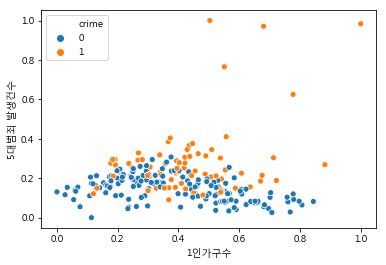

In [47]:
sns.scatterplot(x=Xscaled['1인가구수'],y=Xscaled['5대범죄 발생건수'],hue=y_bin['crime'])

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



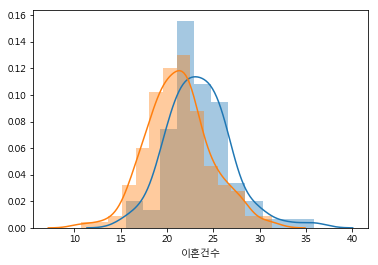

In [48]:
ax = sns.distplot(sigungu.loc[sigungu.범죄==1]['이혼건수'], label=['위험군'])
ax = sns.distplot(sigungu.loc[sigungu.범죄==0]['이혼건수'], label=['안전지역'])

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



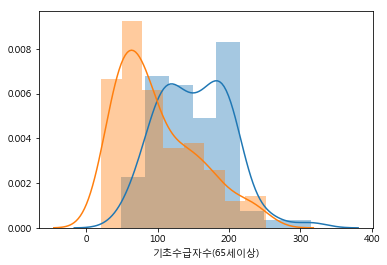

In [49]:
sns.distplot(sigungu.loc[sigungu.자살==1]['기초수급자수(65세이상)'])
sns.distplot(sigungu.loc[sigungu.자살==0]['기초수급자수(65세이상)'])

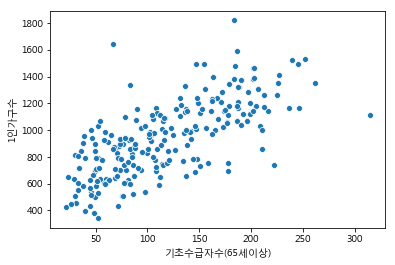

In [50]:
sns.scatterplot(x=sigungu['기초수급자수(65세이상)'],y=sigungu['1인가구수'])

In [51]:
corr_df

,1인가구수,5대범죄 발생건수,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,건강보험급여실적,건설업 업체수,건설업 종사자수,건축용지 면적,경찰관서수,고령인구수,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,교통사고사망자수(고속도로),구거면적,구거면적 비율,구급발생건수,구조구급 발생건수,구조구급대원수,구조발생건수,급경사지 붕괴위험지구 수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,도로면적,도로면적 비율,도로연장,도시지역 면적,도시지역 면적 비율,독거노인수,무면허교통사고 발생건수,반지하가구 수,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행자전용·우선도로 면적,보행자전용·우선도로 연장,비닐하우스 면적,빈집수,산사태위험지역 면적,상업지역 면적,수계밀도,순이동자수,스트레스인지율,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,실업률,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 아토피,어린이 천식,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보험료,의료인력,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,임야 면적,자동차등록대수,자살 사망자수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액(10년평균),자연재해 피해자수(10년평균),자연재해위험개선지구 수,장애인수,재난약자수,재정자립도,재정자주도,전기화재발생건수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주간인구지수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업체수,총전입자수,추락 사망자수,특수의료장비수,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),해안선 길이,행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재피해 경감액,fire,transport,disaster,crime,accident,suicide,infection
1인가구수,1.000000,0.055994,0.102946,0.157972,0.157000,0.675918,0.684771,0.500962,0.174032,-0.205752,0.592030,0.747506,0.588921,-0.211780,-0.423133,-0.146587,-0.121528,0.534827,0.211889,0.097715,0.097729,0.373582,0.341808,0.418917,0.237875,0.234264,0.659770,0.702086,0.568335,0.539071,-0.192116,-0.192114,-0.149188,-0.420062,-0.420061,0.794416,0.347236,-0.192540,0.089987,0.019949,0.252849,0.109052,0.150815,0.236403,0.072368,0.064801,0.034460,0.295714,0.278970,0.071471,-0.190858,-0.141062,-0.244800,0.515852,0.111406,0.140057,0.169326,-0.202156,-0.293781,-0.193610,-0.370200,-0.172482,-0.003113,-0.211890,-0.509328,0.093616,0.054537,-0.190808,-0.009300,-0.187595,-0.244129,-0.051827,-0.149574,-0.452505,-0.462954,0.134606,0.134619,-0.594563,0.414773,0.185396,0.347236,0.419511,0.011259,-0.016772,-0.016038,-0.518961,0.285547,-0.163575,0.390347,-0.199855,-0.189126,0.260866,0.224164,0.302130,-0.093613,-0.076882,-0.140013,-0.074159,-0.123839,0.423184,0.682915,0.718331,-0.576413,0.055441,0.298453,-0.142280,-0.142216,-0.012154,-0.204202,0.212477,-0.219445,-0.489786,-0.717578,0.749303,0.315706,-0.640808,-0.108438,-0.083064,0.086305,0.129608,0.018985,0.631824,0.201029,-0.676373,-0.686876,-0.438013,0.417918,0.081387,-0.149864,-0.149870,-0.143672,0.530392,0.571711,0.508509,0.127021,0.320163,0.284303,0.387631,0.081826,-0.027052,0.177719,0.017039,0.133479,-0.054921,0.257299,0.279544,-0.076351,0.095069,0.334412,0.382088,0.512742
5대범죄 발생건수,0.055994,1.000000,0.001906,-0.001164,-0.073998,-0.314125,-0.345728,-0.210697,0.259030,0.575590,-0.363027,-0.349511,-0.376198,0.189361,0.164503,0.695103,0.524948,-0.359546,-0.259384,-0.276656,-0.276681,-0.210388,-0.201843,-0.322002,-0.152794,-0.208267,-0.106274,-0.192401,0.037173,-0.381340,0.626956,0.626955,0.129902,0.501267,0.501267,-0.342803,0.521047,0.266761,0.898937,0.650987,0.200723,0.366158,0.207871,0.209954,0.059186,0.959050,0.943813,0.300605,0.630283,0.726995,-0.093369,-0.125829,-0.036844,-0.447632,0.114061,0.787419,-0.106275,-0.195583,0.351869,0.595668,0.230963,0.159027,-0.219909,0.390844,0.446541,0.365357,-0.152044,0.125616,-0.137274,-0.032363,0.101932,0.246101,0.208630,0.407003,0.287340,-0.140255,-0.140259,0.059903,0.569621,0.792814,0.521047,0.657561,-0.289014,0.685987,0.685108,0.381909,0.188431,0.140090,-0.221519,0.418597,-0.212880,-0.478373,-0.133262,-0.103843,0.483739,0.019489,0.068901,-0.030231,0.078256,-0.321659,-0.410483,-0.382899,0.396305,-0.194755,-0.110111,0.074962,0.075011,0.356366,0.028869,0.560439,0.457882,0.194054,0.041195,-0.328719,0.088612,0.059313,0.009342,-0.033861,-0.063762,-0.440271,0.115704,-0.32369

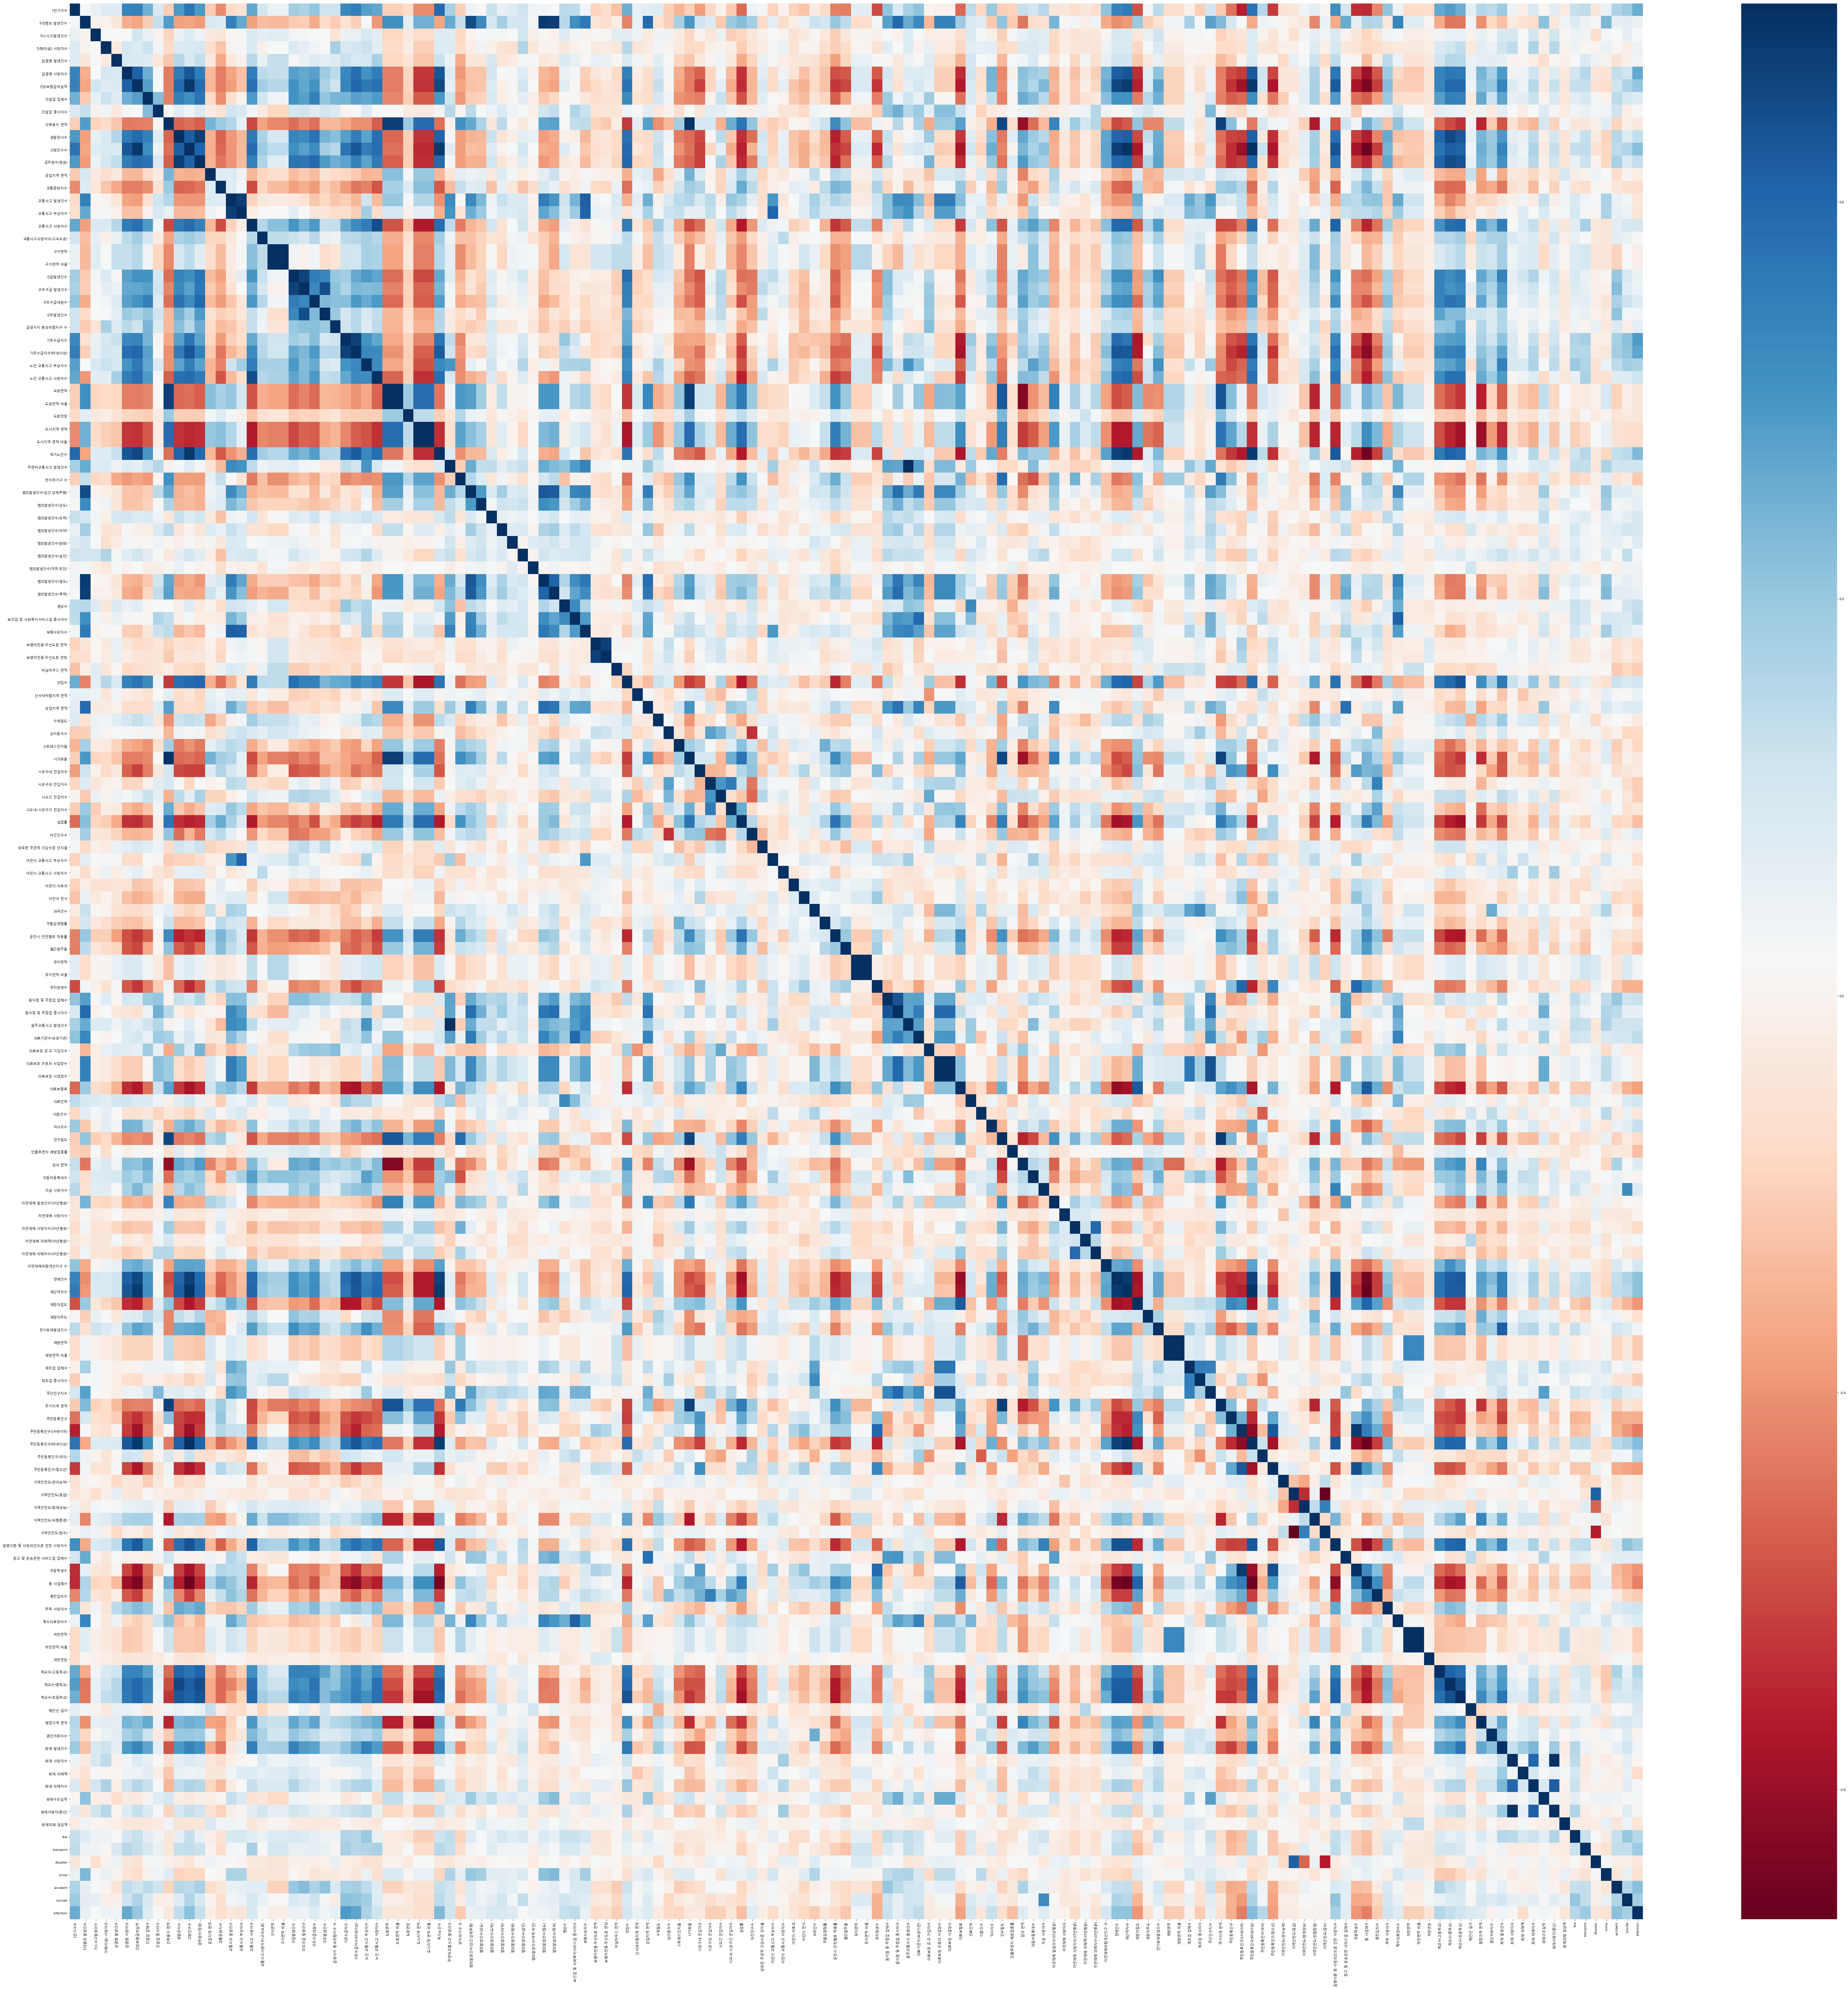

In [52]:
plt.figure(figsize=(100,100))
sns.heatmap(corr_df, cmap='RdBu')